# Neural ODEs as the deep limit of ResNets
## Part I: Intro to machine learning and deep learning
### Benny Avelin (J. work with Kaj Nyström)

# Overview

* What are the core concepts of machine learning
* How do we formulate it mathematically
* Short intro to deep learning
* Stochastic Gradient Descent

In [42]:
%matplotlib inline
dotcolor='darkturquoise'
graphcolor='darkslategray'
regionalpha=0.2
def plot_1():
    import numpy as np
    import matplotlib.pyplot as plt

    np.random.seed(30)

    x = np.random.normal(-1,1,size=15)
    eps = np.random.normal(0,0.6/100,size=15)
    x.sort()
    y = -x**2/100+eps


    fig, axs = plt.subplots(1,2,figsize=(10,5))
    
    axs[0].scatter(x,y,color=dotcolor)
    axs[1].scatter(x,y,color=dotcolor)
    x_graph = np.linspace(np.min(x)-0.1,np.max(x)+0.1,100)
    axs[1].plot(x_graph,-x_graph**2/100,color=graphcolor)
    axs[1].fill_between(x_graph,-x_graph**2/100-1.96*1/100, -x_graph**2/100+1.96*1/100,color=graphcolor,alpha=regionalpha)

    axs[0].set_title('Data')
    axs[1].set_title('Model and Data')
    plt.show()

# Machine learning basics
### Building models: what is extraction of information from data?

#### Central terms

* Model $m$, "extracted knowledge"
* Model Set / Model Structure $\mathcal{M}$, with a certain complexity
* Information - Data $Z$
* Estimation - Validation (Learning - Generalization)
* Model fit: Agreement between model output and measured data

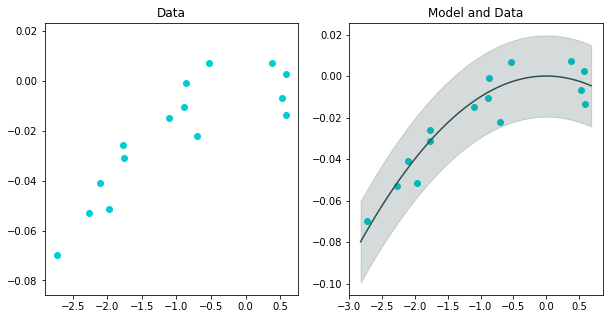

In [43]:
plot_1()

In [55]:
def plot_2():
    import numpy as np
    import matplotlib.pyplot as plt

    np.random.seed(30)

    x = np.random.normal(-1,1,size=15)
    eps = np.random.normal(0,0.6/100,size=15)
    # We need to sort since when plotting 
    # we are connecting subsequent points with lines.
    # When sorting we make sure that 
    # the plot is a graph where the x-coordinate is increasing.
    x.sort() 
    y = -x**2/100+eps
    def make_order_7(inpt):
        return np.stack([inpt,inpt**2,inpt**3,inpt**4,inpt**5,inpt**6,inpt**7,inpt**8,inpt**9,inpt**10],axis=1)

    x123 = make_order_7(x)
    x123_plot = make_order_7(np.linspace(np.min(x),np.max(x),1000))

    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(x123,y)

    fig, axs = plt.subplots(1,3,figsize=(15,5))

    axs[0].scatter(x,y,color=dotcolor)
    axs[1].scatter(x,y,color=dotcolor)
    x_graph = np.linspace(np.min(x),np.max(x),100)
    axs[1].plot(x_graph,-x_graph**2/100,color=graphcolor)
    #axs[2].plot(x,y,color='red')
    axs[2].plot(x123_plot[:,0],lr.predict(x123_plot),color='red')
    axs[2].scatter(x,y,color=dotcolor)

    axs[0].set_title('Data')
    axs[1].set_title('Data + Well-fitted Simple Model')
    axs[2].set_title('Data + Over-fitted Complex Model')
    plt.show()

# Well fitted vs not
* Good model fit is not necessarily what you want

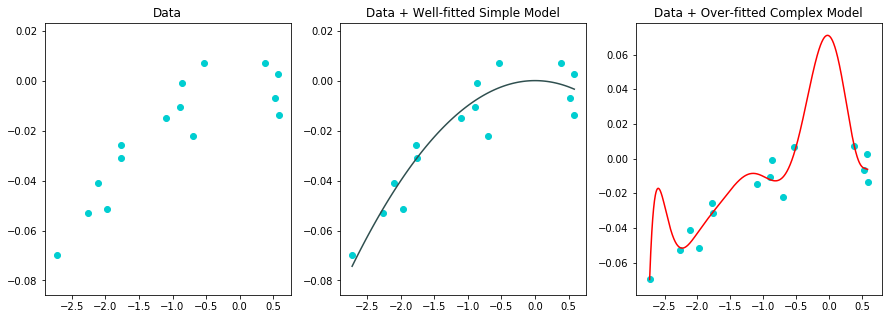

In [56]:
plot_2()

* A good model fit on new data is what you want

# Supervised learning
> Supervised learning means that we supervise "learning" by providing a "label" or "target".

## Classification
* Image classification: x-image, y-class. Could be object identification like saying "this is the image of a cat".
* Text classification: Given a snippet of text, what is its subject?

## Regression
* What is the weight of a person given the height? x-height, y-length.
* Object location: Given that you have an image with a ball in it, where in the image is the ball.

# How do we formulate this mathematically?

# Risk & hypothesis
* Let us consider data $(x,y) \sim \mu$, where $x \in \mathbb{R}^n$ and $y \in \mathbb{R}^m$. 

* A hypothesis is a function $h: \mathbb{R}^n \to \mathbb{R}^m$

* A loss-function $L:\mathbb{R}^m \times \mathbb{R}^m \to \mathbb{R}_+$
$$R(h) = \mathbb{E}_{\mu}\left[L(h(x),y)\right], \quad \textbf{Risk}$$

* Given a data-set $D = \{(x_1,y_1), \ldots (x_N,y_N)\}$ which are sampled i.i.d. from $\mu$ we also define
$$R_{emp,D} (h) = \frac{1}{N}\sum_{i=1}^N \left[L(h(x_i),y_i)\right], \quad \textbf{Empirical Risk}$$

* Call a set of hypothesis $\mathcal{H}$, the hypothesis space

# Goal

* Find $h^\ast \in \mathcal{H}$ such that
$$R(h^\ast) = \min_{\mathcal{H}} R(h), \quad \textbf{Risk minimization}$$

* We dont have access to $\mu$ but we have access to a given data-set $D$, we could try to find $h_D^\ast \in \mathcal{H}$ such that
$$R_{emp,D}(h_D^\ast) = \min_{\mathcal{H}} R_{emp,D}(h)$$

* We cannot find $h_D^\ast$ in general. Instead we try to find $h \in \mathcal{H}$ such that $R_{emp,D}(h)$ is as small as possible
$$R_{emp,D}(h_D^\ast) \leq R_{emp,D}(h), \quad \textbf{Empirical Risk Min}$$

# Generalization
The **generalization gap** is the difference between $R(h)$ and $R_{emp,D}(h),$ we would like to know that

$$\mathbb{P}\left[\sup_{h \in \mathcal{H}} |R(h) - R_{\text{emp}}(h)| > \epsilon\right] \quad \text{is small}$$

We are taking the probability over data-sets $D$ of size $N$ sampled i.i.d. from $\mu$.

# Brief history of Neural Networks

* Inspired by working theories of the brain, Pitts and McCulloch (1943) developed a "Threshold Logic Unit (TLU)" as a way to describe an artificial neuron. Using binary inputs and outputs:

$$
    h(x) = 
    \begin{cases}
        +1 & \text{ if } w \cdot x \geq b \\
        0 & otherwise
    \end{cases}
$$

For $x \in \{0,1\}^n$ and $w \in \mathbb{R}^n$, $b \in \mathbb{R}$.
One says that the "neuron" that is represented by $h$ "fires" if $h=1$. $w$ is the weights and $b$ is usually called the bias (threshold).

# Brief history

* In 1953 Rosenblatt invented the perceptron algorithm which is based on the TLU's and was eventually implemented as a machine.
* A network of TLU's can represent any boolean function.
<center>
<img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/4QBARXhpZgAASUkqAAgAAAABAGmHBAABAAAAGgAAAAAAAAACAAKgBAABAAAAHQEAAAOgBAABAAAAXgEAAAAAAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFeAR0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2XvWA/jbw9HI8b6kgdSQw2twRx6Vvg/MPrXzxeg/2hc/9dW/maTLPZv8AhOPDn/QUi/75b/ClHjfw4f8AmKxf98t/hXiPNKKLiPbv+E28Of8AQVh/Jv8AClHjTw6f+YtB+Tf4V4jThmi4Htv/AAmfh3/oLW//AI9/hQPGXh0n/kL2/wD49/hXiVKM0XA9t/4THw9/0F7b/wAe/wAKP+Ew8P8A/QXtv/Hv8K8U7UhyTRcD2weMPDxP/IXtv/Hv8KX/AISzQMf8ha2/M/4V4jjijBx+NFwPb/8AhK9B/wCgrbf99H/Ck/4SrQf+grbf99H/AArxLacUbaLjPbv+Ep0I/wDMVtv++j/hTh4m0Q/8xS1/77rw/FJtouB7l/wkmjf9BS1/7+Uo8R6Kf+Ypa/8AfwV4YV4PFGzjoPyouB7r/wAJBpB/5idp/wB/RS/29pJ/5iVp/wB/lrwfaPSgoOOB+VFwPeBrulZ/5CVp/wB/lqRdY0xumo2f/f8AT/GvAtgz0FNKjHQflRcD6B/tbTv+ghZ/+BCf40f2tp3/AEELP/wIT/Gvn0KMDgflRgeg/Ki4H0F/a2nf9BC0/wDAhP8AGlGp2B6X1qf+26f418+YHoPyoAFFwPoT+0rD/n9tf+/6/wCNA1KxPS9tv+/y/wCNfPYwKExii4H0KNQsv+fy2/7/AC/40v2+y/5+7f8A7/L/AI18+DmlxRcD6COoWQ/5fLb/AL/L/jSf2jZf8/tt/wB/l/xr5+HIpcdqLgfQX9oWR6Xlt/3+X/Gj7fZ/8/dv/wB/V/xr5+UcmnYNFwPoKK6t522xTxSN1wkgY/oalIryP4dZXxVjsYH/AJV67mmA0dR9a+fL0f6fcf8AXVv5mvoMdR9RXzxezt/aFyPJJ/etzn3pMBuOKNppomJIBhI/GkE5/wCeLfnSAkCmr+lWaXly8cu7asbMMeoFZyytjmFxW54Xcyam48tlxCx5oAxypABPcUoWrOq3w+1x2r2pjkjXqrZDd/QVo6d4evdRskuogio2cBzg8UAY2KMH2rdbwvqCtj9yfo//ANageFNTIyEi/wC+/wD61AGEQc0bTW6fCuq/88k/77pR4X1XH+oX/vsUAYWD6UFT6VuHwxqoP/HsD/wMUh8Nar/z6n/vtf8AGgDD5zjFLj2rY/4RrVs/8eTn/gS/40o8O6oBzZSfmP8AGgDGKnHQUm01sHQNTH/LlL+Qpp0PUgP+PKb/AL5oAyNp9BSGtQ6LqI62U/8A3xUR0i/B5srj/v2aAM8g54ppHHSr7aZfD/lyuP8Av2ajOn3g62k4/wC2ZoAplaTbVo2dyP8Al3m/74NMNtOOsEn/AHwaAKxGKXH1qVoJf+eT/wDfJo8qT/nm35UALbWc927JbxmRlUsQOwHU1CoIH1ro/CqBdTuCSM/YpCQOo5rBVDgZB6c8UAMApQPan7fY0u3g8GgBuPSlwfSn7falCk9qAGKOc4pwGOgpwU0u04zjigDpPh+xHiyIesMn8q9dryLwEMeLYP8ArlL/AOgmvXelNAIOo+or57vE/wBPuP8Arq386+hB1X6ivmO/vLldRusTOB5rcAf7VDA1NlOVKwPt10P+W7fkKcNRuR1mJ/4CKQG+VOK3PCi51Vx/0xauG/tW6HSU/wDfI/wrqPAt9cXGsXId8hLSRhkDqB9KAL3iTTTPF9qhH76HkH2FdR4Vuo5/DFs6EbhlWHo3cV59L4i1HLAyqe33BV26vrvw5o8N3p0pVrlwZFcBl6ZyBjigD0ULlhnvV5U+WvG4/iJryMMvbsB2MXX9as/8LP10D5UswPeM/wCNAHrvl04LXksfxN15zgQ2JP8A1yP/AMVVn/hY3iBQd1tYZHUFD/jTA9S280ba8uPxL1xQS1jZ8HGQrf405fiZrHJNjZnHpu5/WgD1HbTtn+cV5gvxO1Urn+zrQ9Rjc1TRfE3UWeMPptqquwXd5jYHTnp70Aek7fakKe1edXHxOuoLqSKPT7WaNThJUkYB/ccU+w+KEl3eC3ksbS2BVmMks7BRgdPu9TQB6AYx6U0x+1ecj4syMxA0aM49Jzz+lOX4sMwY/wBig7Rk4n6fpQB6EYx6U0xDHSuA/wCFrDvozfhN/wDWp3/C14B97R5PwlH+FAHazLiKWQZGzOAPaiWNvs8wQAyKp2E/TiuHk+JOnTPufR5mJHPzKc/mKlT4pacibf7IuQvoHWgDoo31LcPOgjAzlgpHTGPX15qxYi8kucXUSiLYPmCgZbnjr9K5f/hZ2jj7+j3Xp1X/ABpw+KWjkFBp1+F9AycfrSA30lc6j5bYMiWsrkbcZ+ddvH4UqtchCJLZBJsDKAnJrJ8P61Brmt3l9bwSxw/Ydio+Nxw3PT60knizSrYpFLZXiEDIDbf/AIqmBqu02N3kIDvA2+WeBjrn/PSpEjuOWa3hAy+AU5OM4/l+tZ0fi3TZLFpE03UWtgTucKCo9ed3vVdPGOgDB+xXYx9P/iqQG5ify8rZIW6bdnb1rRitIniRngRWIyRtHBrn7fxbpUiu8Gnag6gYYpGGxx9eKVPHujxIFW3vAB6hT/7NTA6H7Fb/APPFP++RSGxtv+eER/4AKwk8e6VJnZb3zY67Ygf5Gk/4T/RwcGG7BHrGP8aAOo060givEdIY1bB5VQD0raNcfoPi/TNV1eK0t0uRK4YjfGABgfWuxoAQdR9RXy5qOP7Sus4/1rdz/eNfUY+8v1FfL+o5/tG6xu/1jdx/eNDApEd+O/GaCMdwenelIPv3o6c89qQDccdR0Peuv+Hi/wDE6vOh/wBDk7+1cmGyvU9Dx+Ndf8OiTrd6D0+xyUAWbiytx4fE3kJ5p/ixz1qLxAobQ7GNlBHmY6/7Iq5PKh8O+WHUuozt71W15GXSdPJzgv6554oAwfDWmx3Piiwtb22RopmO6MtnjB6+lbvizRNN03Uo47SzjjUw7mAGe5GazfCNwX8aWlxdlEKgljkAfdPJrovE7xXWrQSQzJIGtmLlGzjJPH8qAORWztjHHiMKwyWJ78VPHawM8oUsg3YVs7sDg/zqS4QxQwkDoeWxz0BNPW2CCVtjCQAYwcZBI/z+NADZrIxlFkYE9HYchunbrUS24dHLRESR4XtgYwDmr0ThYQsoDL0G44PHNPaMtGUZN27uf4hng/59KAMtrOHf8omCYDNnHy5x0/Ko47CUoAqGRw27AOQQPatlYVWViGyu0ANnPbmnG0iitgoZldyBuHUkD/OM8UAY72K5Zt7YjAYHaMHgd84xUEekecikOzMw3MNmMfrXS27Ss7wsYyS23OOc+56VRnsJ/MD/AH8MQykYPJ549KAMyLTglrcRBQS+3DGPJBz2OcjIJ45z+FJFpaKzoXbLIP4eQeuMZ9v0rSexxFhRgg8cYPcHkVPHHIlsMMsrKVHzds/zoAxf7LyiTHd8x6BegpV01WnaH5jhwitjGScCtZwbiBdkbNl8HDZUHA61GCwm3gxghldQCOPrQBfn8DxwywxpqC73C8bOeT9enFUJfDUUZWR7l9meSEB5xnpnmtPW7+/mdJ5ZQqADEaLtHX9a583rSIEeWSRs/cxx0IoA0k8O6VcSBW1SYMQ/AiB5GOevPU1y2qWcdjqU1rHI0iocB2XBPANdRoVq6yo8nUq3UH2rA8QgjxBdD0I/9BFAHZfD8lLG/kU4ZbKUg+h3CvN2YyuXc7mb5iT3J616Z4AUHStSxyfscg6+9eZAdPpQB6J4fTPw3vDtBAeXAP1FeehV9BXoXh/f/wAK+u0B4MrcH6iuGuLK5hLO9tLHFnhmjIH50Ad18PlU6Jqvy9Dn/wAcNcA4XzDlR19K7nwGXGkaoFYryM4/3TXIahatDcN+5dFxncV4P40Aa3hONXuLpcD7i8/jWLfqPt8wwPvV0PgyMtdXYx/yyH86x9Xt3TUJWETBc9QOKAOm+FA/4reIgc+RJ/Kve68C+F24eObUDjMUmfptr32mgEB+ZfqK+X73DX1xgjmQ87evNfUHdfqK+YbwobucgYJc/wAXT5v8/ShgVGXk45HOOKTHzduo6ipMt82Se/8AFSY59/rSAZ2+6OhHSux+HIB128GAP9DkrktuVzxjbnrXZfDqMrrt8f8ApzkH3qALU1pEmjLMkeZGHJB603xED/ZGncHmXp+ApZb63/sOOHzk81Tgr360/wAR4/svSuBzL3+goEcl4Uto7zxNb28oLRyMQwzg4wa7DXtGs9I1ZIrOMoj2xZtzE85rk/Ck0dn4rs57iWNIlc7mY8AYNdV4r1K31DV4pLSVZESA/MjZ7nNAzFuFMlvG5GF3HB65AAzn25zTyN/msOQwwCBgjkZ/pSs/mqu8DERLKOeM/wAWf0/CnLIAXYBSjHduHPPfPPt096AIkURTI5BkA+8r8YOfT+lTiNpTsBDDd2Gent1HrUUrbyjKu5Nw+Xdyvr/n0qwAYUiZHJPAGTxj6D8vwoASV/KYHKg4GF9fqP61V3liiRq6px3DZNXv39wwAkQqQAB5ecf5PekiXyF3uAztxiPCk++D0oAg81o2XfuLrxgAjI6dantnUxIoYKy8KxUcHPT+VO8oXDY3EIV5LdAMcnimC2VZBIkpI3Zxt7Y+uKADPlmTAUyk5dBjkk9h2qKaGZkDuPkyMDow4xk+nHFWoTAkMihN+45GRu4HbA96jzO8uXgIjK8Ofl+Yf/roAgVYRbgESQ5GckdPfI6VCFZpQrICW+6FPX/GrdzhQmAJJACSc5ViR2Hf3qMJCibyWI4JRACQT79+v6UAS6p5lwcXMkaJGBtCNkMPbP8AP6Vk2scck8ccUTybuTkhc4B6VvXdnJ5YfyEL/KQWYEdRg1ixJO92sabWfG0kNn14HpQBsaSZDdIjvuBRjgHpwtYHiPT5l1G7vSo8pmVQc852jP8AOul0u1ktriKWYKoKMMlhwNoNYPiO1vLvVZZIo5HgXBTA4JIGe9AHUfD5P+JHqJHa2kFeXAZIr1jwDE8eh6ikqFWED5DcGvKcANxQI9I8Mwsfh5dyDbtEjk5BzwR0rN1m8u5/BltK0+6G6lZFjZPuBPRh61r+GG2/Di6AXdueUH9Kqy6fF/wjNtfvLOLeWIoYwxEacAbl7Z+U9u5oGN8AWssukarKHURrgFSOSdpPFQ3up3U3g2UoyG2lm+z7SmCuBnOR1+la/wAOTEdE1ryw2zf8ueTjY1V4LYDQILiVblIlzmPO1GJXaW9M9/rQBheBy32u7jwOYx14xya0Jbu7OgauIpI1ghZYmiZM7i/fI4GKk8B29tNq2qLAjhEiG3c2T1PtVqHTfN0u9uVlkRIbkG4iEYIcA8bs9/SgDL+Fak+NIQOgikP/AI7XvFeKfDqGGD4hPHC7sqRSAbgPT2/KvbKaENH3l+or5ku8m6n4bPmeg9a+mweR9RXzNdL/AKVMCB/rD2PqaGMqEHJ69DT9uc4JPNLt/l1xT9n06+hpAQbeMe1dj8OhjXrv3tJK5XYfT07V13w/UjX7n0NpL2oALm0gXQ1m8tPMJ+9jnrVrxEP+JXpP/XT8+lQTlP7EGCM5wQDnvVnxGMaXpHTiXPP4UCOR8MafDf8AiS2tLu2xFLu+VsjIx1re1nSbTStXeC0gESCI9MkE9+vfis7wpcrdeMLaTaIl8tgdz5AwOvPStzxEkb6lHsHy+WzZ3ZIw1AzJMJMCBtrb0J4PI74/Om2qeTDI4+UO2wk+mM+nrinXUbm1hcD92DuWRc8g8j9aslGWzYuined3B+mf8+9AEcckUTbWTbIerDJzVzyyInOEJXayhyMAE889uapRSsMfusKewYk+nX/OavxF4wyuUkU9c/XOD3FAERUlQ0rI6qAQEY9/8KV9sjorRFmb/lptyAe3SiTBCrEJAg++i9D9QetTm3SOIDGWyX5BAUEcdevtQA14txiQEISSAB3IB4I/Gq7WsnMo4KnnnnAPSrCYGNpACncQGBJJ4qCeJZIQFCMnUbl+ZWzgnH/16AHgCOQP5zgEcbTjGe+agmO9+XYr94c7vl/u5P8AOmyFvNTChlAxgDqOh/UGkkkeeQ5UbnX5dvOB6EH8P1oAdtQJuyqyHkgDkDv/APqqw0Jt5jnbISo69iOv1PemW1ukriYnaQCScc+hzn/OKfEswkIEeBwWGcjOO3HHf9KAItXidgiLqEgUqAqeWABzkc554rJtLW5dx5WoTpjgEJjAOe+fb9a2dQmKQBdiqXXAXb33denB4rMikkdykUOzd1Urnse9ADzZ3YMe/Vbhxn7vpwOOv4fhW47DyCT9P0FZluny5Mbk7MZ24A+72rVbmI49B29loA3PCwBsdYP/AEyb+VeM4O8jrzXtPhcD+z9XJ/uMP0NeMn/Wn/eoA9N8Mov/AArW5yefMf8AmK4CbW9QlsvsE11NJbKuFiYnavPXFei+FU3fDe6HrI/8xXH6x4SvLKwl1Nru1lhBBZFclxk4HGP60AdL8NGX+xNYQsAcggZ/2GripNc1KOE2S3Uv2VXz5LNlM/TvXX/DeL/iX6tIMfdC/oaxNU8K3ZsZ9XW5tDDGu5owWVvyIpgbHwxk36nqbSOMtCrHOBzuPSsHUdf1GxvL20gldIJJizp2f6+taXw8TN3fN6RAfqTUWt+Gp7tLvVEvLfZFuLRMx3cHtxSAsfC12k8bq7HLPDKT+Ve6CvDfhSm7xiHBA228mQTzyK9ypoBvcfWvnG+T/TJ+v+tb+L3NfR/euFl8K6NI7MdNi3FierdfzoYHj4Tvntmnqu5+cZya9UbwpowPGnxj/gTf40z/AIRjSxjFkgA5+83+NIDzEIBj7vbrmur8BRY1yduP+PWUcV0n/CNaWD/x5r/30f8AGpdP0+1sNajW3hEZe1mLYJOcD/69AHKz2MKaKbgKd7HqT71Y8R/8gvSc/wDPU/0pl3cRL4eSMSp5m7ld3PWl8SOqaVpRYhQZTyT9KAOT8HWsd94jS1mBMckcitjr0rp9Z0W10jU7URbjC9uzMshz07ZrmvCBFr4tsWkljjTed7lwAAQe9dp4oube41O2aKWKaJYShMbhgCT049qAMKQyLbRqcDcCMKc4z8w/CrEISdVjllZWKHYEHJz6Z4yPSqoYuzso/wBXnAzgZwB27/40scAVSv3iR1A5Hf8AHPb6UATeXAqqgwGXHytGehqaMhC8oLkr02rg5zn8RUcEE0U29GJiAOCz8jp9D+NM2AQmQk4LlsuxODjoPpzQBfDQybSN0cgwQ+7OT7ds9ahuYfORRGJHDSfMY254HGfb8qgW4WXcfvEYIAJUgY5x9cfzqWIo8SJEQuSdynuCe3p16UAJDabPM5byyvygnJyMcY654pHDFgqHAK5VmIyG68jOSPapvngl6b40Vuf4j8v9e1QlmubgBXZVB53DKkZ6Z/H9KAF+znz5FKtGQRt9M+nv0zT1gKyqzFlZV2gle/r078/5NBt5FuSzzOQW5VWyMfQ/4GlEsMV4XBZmIIIIG3gE9PWgBm0xsy7id3OGyDn/AD2ps8ktvIh2u0KnnB5Xvj+lEUSQTRJvID8xlsfLnsPx9abGR5ZQIzKvO4HHb0I/PvzQA7UogsrB32BSMheCM4Pfp1qjZlIJtnyyHgqc8gfNxWpqULzQpKqLuZcli/Q5HWsm3jVH3TyZXjMaNknrQBqPct5SA7FG0AAfRasFW8kcDGB1+i1QaGeRUkaJlBUARpz2HJ96fNrWnxJskmKPgAqyEEcDtigDrfC+f7N1g8kgHp9D9a8XP+tP+8a9k8KTx3GhatLEQ6NnB6Z4b6V402TI2f7x60AeseFyP+FYXTqDu8x/0YVzGo2vmeFopHMYvWd5bmMSYdU4KlxnpyMfWuk8K8/DC5+YA+ZJyfqKgubqzj8NW90j289z5e14gqtIwwAQRj0A/KmAfDOFH0LWGI+Y4HX/AGGrLntftXhq4kdWW7ecIqGTa7RbeuO4/Ct34bzmbRdZkxGhaQt8gAAyh9KZaiFfDkFwfscs8Z+QK4L9Om3qaAMj4XwpNfahvyVEC9D7mpLq0trqy1gvEouvMRLZWl2u4z820dxmrXw9uPO1vV2EaRjYuFRAMfMR2q0iWB0XULidLc3Fvcl49zjeSOcqOtIDC+Fny+NVXGCIJBj8K9yNeK/Dq5iu/iAZooI4leKUgKuO1e1mmgDNcnLvycainV/4R+A/4DXVGuWmXk/8SxG5k7j/AD81DApnzdwI1SPGY/4B+P8A312pu24dTt1KLO2TGEGM54P4dKe8ZyMaOhOYu68Y/wDiaZ5SiP8A5AoIKS/KNvTPT/gVIBVS48wZv4ipkX+AZIxyPqTUljbubxJpbmKZlt5F+VcE57/ToKaIh5w/4lPWVMvx12/e/DpUunxoLiPbpht/9HcBiB8o5+Xj160AcBd6bbDRTeCPE/mYLZ96XxkM6Fpfy7gJTwPoKu3wC+GFwRy/PP8AtU3xF/yDdKHbzDnj2FAjk/CumWes+JorK4hbyHDllD4IwM9a3dc0m10W5FrahxGyqyhm3ZGSD/KoPCLEeO7FS0LKIWCGIYAGK3fF8IXXrd+BiHcM/U8UDMgxbIcohaThGII5wD2+v+e1RpH/AKQHY7QU2n2z6mpIwPLiVThwevtnPH5Uu8tHtX5gcAMSOPTigCxsYxoMZ3424Iycf/XFIyRDyxEVVVGNrHH+eaJXRFDmMnZnYF+XAyeeD/nNIY1eQ4U7XAYHIbB/pQA5BO0ud5ZsE4PIx/WnDZFKsikglc4Hf1JOPfp3qGaIxqrlg2z5gO+B26U+Z8q7/KucOBuHzDGenoP8aALihSSTw+T8pxjOO3pVSNmP8KhOSoH8Pvz/AD96c0YV4/vMytncMLtJXJPvngYqvJKVQRgNHkY3MeAR/Tj9aAHQ+VIURAxXzAGYDAOMn16UQujT74xEqnkBckjOef581HF5h3eaHBaNh8g6DHYdD3/Co1jMUKJbKduAFZsDp/LoaALEsUkFvtjjTfC25sLywznj09fzpLr/AFhnaTBYBlQjjrg/zH51LASfLlFxl1+YYbJz0wfUUy6tnMTFX+VecZ65IB574x+lAEGpWN7mL98YysYB56k/rWTHZ32wTLfcLhQxLccE4A/z1rd1q7YXMZ8rgqhYdj9M/hWRBcxhw8hB7hO3Q9f0oAdbW14t1FIuqysiMA6KzjjKgj/x79K3pdKsbgebNB5krRZZ3YksQh6nNZMLu0vmooETMi456hkzXSDBhX/rmf8A0WaBGj4ZgitvD2qJCqog4APIAwfXNeNHBkY+9e06CCPD+q7SwOeqg5+6fSvFT/rD7k0DPUfDcu34Z3EaoSTK44OP4lrzKVnSRlZssDg4Oa9I8KOn/CAXqnOfOx+bLyKwNfg0AaVJJa2k8N8GAEhZyjn+LHagDa+G10sekaxEQxJ+b/x0j+tcBeeZHdyKzHOfX24ruPAHGk6sR3xk/gao6pBobaPPK1jKt6ECpcBn2F8dOm2gCx8NZ1g1K+3Z5gBxnrzXNeIPMi126wxG5ywwe39K3fAIAvrs5wwh9e1WdYi0Z7e9NxZ3D3iqdtwrMVVuw4GPzoAi+Fh/4reD3gl/9Br3Y14X8LMf8JnDuHzeRJj/AL5r3SmgG1y0hhDkm/lxmX6e/bt2rq8Vz0q3Zzi3g/j6t/3z2796GBl5tyw/4mE4/wBTyejenb+LvRJ9mWI7NUlVfLlOVO49eW6dqukXm4Zt4CoKfx9P7xxjt2pCt6q5Wxt94R8fOOueB079TSAqobc3BzqU5JmQKuOAdvC9OQRzU9ibfzIxFezS/wCjSEI5PzDnLH37VOi3u8fuIAgkXnJztxyfrnpU1ublnTzrZIx5TEkODtbnCj8Oc0wPMb2yiGhLdBpN7ydCeMZ9Ks+JONN0oekh7+y0upun/CPIqupbzOQD05NJ4kP/ABLNM6cSHv7LSEcd4RtUvvEttau7Isu4bkOCOM/0rqdX0iHSr7yknmmBhLBpeSDmsHwQhi8Y2ZcrtDNk7hwMda7jxUI/7XikjeNh5OT82cndQMwVZohASSc7gSO/Tp+ZqKOEW6GKMb9uGHpj39vep/Ot5SYdzcliMDqGIwBUcLbYm5BYYxkdVOCfy5oAdKT9rKZVhsZVznPWkjuEJYBmDN86YHT/APVjmms3mBLjOEZtxYE5x3/Wow0azFlVVZwHRiMDjHB/z3oAtHM6hSjLgcH1OO4/lTmYPHC+TvQArg9VI7+nOPyqCIOs+xsgMAAc8449KdLsSSb90GLNhFBxjHv6UAT2izKD5u0jzDnBwWyOwqJ18+LdGMPlk7jn06cVI/nrHNIzbyPut6DHTFQ2aqswErIA/wAyovBxnpj06UAK6qjBvLKlTtbk4x6465qN4gzoMuAueBzjk8g5/GpHljmjnjDlTnrjAyPX3/wqJGadAuSwyEk5Ax3/AJ+lAD7cyGF4iGZs4LYAzxk5I+lWIJl82aAjBRxgZ7Zwf6VXadI3hUHbHuzuPI/E/wCetMtplSWcKnznIbvk5xkflQBFrCCedGBH7w4JL/dxx07VBata27xlMucAHcAoPB7jnHSpdTSMzPMI88gptHU56VDpkcrzLGqHziOMnGBg5/rQBsSyMI4IsjAkXAC4A5j6VoJjyVB7o3f/AKZmsdYis4Ct5kS7GMnGd26Pj3xW6BugH/XMnp/0zNAGlowH/CNapuwAT1JA7e/FeLfxt9TXtejmNPDeomVJGTdhhEPmxjqK8UfHnPsbK7jgnuM0Aep+F0DfDO5G7ad8jDP+8tYlzZ3d14YtNPS3uHki8yYSlhsfcAcAZ4PI61teGWA+GVyWGcPIP/HlrFvvFOjSeHIbS1hMV2iYDFAyg/Q9c0wNb4cwSRaFrCSptbft59QhqmLG6uvCsNkIpj5k/mifHyjKcKRnjpjNTfDqTdoerFyThsnH+41Ztv4n02z8PyabIsrztJuV1BwgwPfk0AaXwxtprXVNThuUCOsKghsHnd2olMyWmsw+Xcst5cpEssa/JHg9GGe5Oag+Gsu/VtTkOfmjDAnqfmNSyeI9O0+w1eylZ/tTzs0RVRx9fWgCt8N7ae08feTPE8brFNkOuD0Ne3Zrw/4aXM1z46SSViWaGX6fdr2+hAGciuXkFmN2ftPIlPGf+Bf/AFq6isJxecj7TbqMPzjp/d/LvQwM8JY7+tzkPD13dcfL/wDXphFiYcB70ho5fuk5Iz83456VdDXgYj7VaHDR8EYOMfN+J7U7OoeXzLalwj+uN2fl/DHX3pAQKtsLhf8Aj+yJ09dudvH/AAH196ksTbl4xC96cwPjz87cZPX/AGs/pUwN75gIe32eYvHOduOfxz0p8JvS6eebfb5T7vLzndz0z2xTA8q1LS7aDS0uk8zzXlOcvkdT2q54kGdN0vr/AKxh+i07Vwf+Efj6/wCtP8zUfiM/8S3S/wDro39KQjltB0q3vvE9np85ZYpyQ5hl5xgnGccdK6fWPDOn6FqNutr9pZGTcfMlJ+b04HSsHwVcTXfjjTnmfe+SoOOwU4ru/FdubjVY1ORshBOeOMmgZysSDcpyVIDLydxKj29qly5/fggJITt+YEcKf6/zqMwSQuBuB3cnPCkcc/Xj86WK6CwuF8wDLDI7HHU560APEMqwFdpdP4lIyME9Dj6daI4Y8bXjCooCruBHXjAzyD0qEAgJulJyoySdpAzwfftTmhknLq8sUsZOBiTBX/P/ANagCaNxEmx/KKYwCwI5HbPXsaeBDPEjsPuAAk5A61Wu/OWUlIlaPHDv8x6DOR2xyKHvJBySsmWxtwCNvTHPFAF5iCjBWdU3Alcg7e341UZYhPkxtgHkMM7v8BQApZ/K3yD72AQWXB5G3GMVAs4bKSSMuCOCu0//AKs0AXnXLboVLHP8XJIP41FPBJJAd7lFZcAZwcjnj+X/AOugNBMQ7GVGDbclsjIOe3+etI+5cCIIkhGWRskHnsM0AUvs7yRSQRqvJ3DcvAb1x6Yq2IpAJGGNzHJIzg8g5x9KrSzXEiJcRMhUDa+Oq471Msj+TEbghXGN5C8tgY/lg570AQ3InayUC7QjzCN+Plx2IH0/rVBbO5DCQ325gPl+U8jGetaF+8kYZIkVUwoB3ZOBnoe2c5/Gqib5NqDfKeC21CwHy8DNAGvY6TPeTxpFqn7pMlo1JwxGO/bt+VZ2svdWMjWqvKqKFG8TN83Dc8nIz6V0+gnM+QrhWD8sAM9O1c74qC/2hNn7wZf/AGagDq/DMjP4BuZJW3Fupf5ucn1NeRsMN+NeteFmK+AJ9oP4H3P1ryaUZlP1oA9A0C5lHgKeBSNplIAA55Zc1xN3pV7Z75JrS5jhBwHkiKj25rt/DtrKfA0twEHlCXJbPQB1zWXrOp6pN4eCSXMEllOxCRqzb1CHn2oAteB7p7fSdUjAAV1LEkeikf1rmtU0i6tpGn+zXBhYBjIYiFHA710Pg+3ln0DV2jUthNoAx12n/CrN7d6q3hq78mS2FicQuu9txJUHPpxQBS8A3MltqF0U24aIbiwz0NZXiHT7kapcXKQTNEx3s4jO1enfpWl4GV5bi8ReQIwcZ71p3lxqn9lamLa4i+xwqsc0bE5y44Ix9KAKnwsH/FbQH/phLn/vk17sa8K+FeV8axKDx5EoPv8ALXutUgEJrm3WFQxbTpiv73PfOevGf4q6MisGTzcnGoRA/vBjaPw/LvSYFZltlkA/s6Q8xEEJnnt/3z3qForTyip0+5KiOUbcNkjPI/E8ipwZsD/iZxE/uz90cjv3/i7UZuGTK6lD9x+dgxnPB69BSAMWwuFP2Sfd5yc7TgNt4PpgDipLJbcTQ+Vb3CEQOFMikALnoc980qpKJMnUOsinbgY6cr9D1p9ssqyIWvfOAiYFcD5jz83H5UwPMdV0xYdP88TyMTIRtJ461P4iz/Zml/8AXQ/yFTa7/wAgbGRxMf51X8QYOmaZ/wBdD/IUhHJeE7Nb/wASWlq0jxiViu9PvLwTkV3F/pw0PUJLdLia4EltvJmOSMZFcl4HjdPGmnbhjEhzyP7prt/FrldcOMH/AEH19zQMzmlRo44ZPmQHA3D025Oe/X9KhSBUhuGiO9FfjqO465/p6UgYCOylQbpCz5x2GY/8D+tIsAU3kgyArjKk8n516UARy2+1EEmNgXAbpjJ6f5/WnwWxjUTOhKZydmTuOe+B+mKR5t7QKsRO1BlCcA89x/8AWqNDIUeYsQA+B83UZ459PzoAmYmJ3h37fNGfMLYxgA9vWmWyowjk8v5u+xwCSCDx65/rUguJ5GaNkLHZwyEZxj6VFGnyxMsr7i2SpULnpx796AJ5oH2zSgy/IMdRknI4J/Gqi+a00cRCuDlcFTn/AOv0+tXXvHijuChUSKCxyfl6j3qI3Qu5bdJI9ruvBjc5HPbtQBmbWRCEj8sCTqucE+nsauQxzqVDBmXyyw3AndxyDx/k/Xiw0sflM0wnDhwpaM4Jz3J6etSLJGUO6eRh5WQOnbPOP89OaAIFBeJGSEvtOfNdQg/Lp+dMXy23K7IZSc5JC+gzyeT0prztLbxPvXBfaMbuRjPfrUXlKt/PHGHmBYAg/UcdaAJtQhifZE2A3AVyBkfjU9nK9ta+XEsaJnBK/MxbYRx9aXV9MeK/CpFvm3DKhiF5Pp27VlrazvMsVvGol6HaMnoepP0NAHW6bOouI4VIcBny3c8LXHeKJ5Br9xbs/wC7JDquPY11uiafNazxebtOS/A5OcLyT36+lcf4rjZvE9zIWGEKqBj1U0Adp4bBPw5mwMnJ6/U+4/nXkrOS+T3Nes+G/wDknUx4++ev1+hryeTHmt9aGB6b4euT/wAKymiK4QySbm/4EtZ0mmJN4etY57nZZKrGPEeSjEDJJ3ZPOeCBV3w85X4bzDAwHkxx3LL1rkrnxhqFzpwsJY4GgCbGAUgt6E89aAOr8BiGLRtYVJGkQPjcFwSNjYOKSysEn8NBTdILKScSTJsy27GMg544xxVf4fsRomp4wSHHX/daufj8VXlpYPp8MFusRclmwQzZ65oA3vBNtBaaxqEMdwJgqKAwUr3Pr0NXlspJNL1Hy7iNIJbpTOjKSWC4xg9uM9Kyvh24Go3uVGTGrfT5jVebxffaW+p6fFHC1vPKS4K8/QelAGp8PrSGz+Inkw3KzIsMuCFK4+XoQe9e1V4X8Lmz44Q4A3Qy8eny17pTQhDXPvH8xP8AZveTnI/z81dARXOu0QZv+Ji/WUn+v5UMZCE+7nSMEeWP4eP/ANmmMi7G/wCJQfuSDHy889Ov8XWlWSAlcarJjMPBI5z0H/AqZ5sRiz/a7gbJMtwO/J/4D0pASKiCcf8AEsIPmqQ+RxgcN+HSnaeYTOALJoJEjYYwMKp5xnvk5PFRiWLzwBqTf61Rs45O37v49ar6TIJNUlT7c022PCg4+cYPzcenSmB5JcNuuHwTjccgn3Nb3iSWQaPYFEUlJD1fpwOao6lpMlnid3BWSQ4A6jmrXiSDfo1gsgyN7Y5z2FIDhnBimdQwOCRlTwefWpILmWNztkkAPBAcjI96t2lh/aGpwWqyHM8mxWKYHNbOp+DJ9IuraC5uoz9oDlSgyBtx/jQBiJf3J2/6TIrJ919x/X/Gp11Kcho5HdGYgkqB83OenrnnNTjQkaBJRclSzBdpXkHB/wAKlPh6VfNT7TE6RAk7lPpng0AVjqF+zqyXplwMBTgED0xilS7u402GUICclWK8n61IdGuMRbZLciQErksOB65PFH9iXa+bia2Xym2uB2OcenNAEsWpzByN8ZkZcfuxnPsasLqk21UZAADnaTlvwB4qrFpd75oiOGdhlVV+o+n4VYW1lSIO6Ax5wCSP5/hQBKdZXMqG3CmTg5bB7Z4/AVPFPfSRxSRW8ZUcApJg9e9VTbSI7RiEhkGWUk/KMZ/lzWtYyxJYwA7FZgcYB+bB7fmKAKyQ36RtHGAqbwzADac9c+9Ik+oi7lZIolOzYVKZDj371eSXDzM0g+Rhub+725/Hip/PLSomWZmHyr+lAGd9gu3hjxJHEsbbgjLv5Iwee4+tOFretcuUmt41ByzDqRxz7dO1WzcwNFvyAmcZAzk/WoZZNkjxJhdo3Mo6jjP8uaAILq41OaMoLkF2OSwAUD6cZNVIhrIYbb0gL6YGeMenvV2VJomHmW0/I3cr2/OgS+XImbO755+6Oeccc+tAGfqt9rNg8ci3skf+yG9R1P5VlXN/LeMXuId0xAJlDHJA9a6HVoLvVoY0t9OuFYyA/MBzx061z95YzWDCG4jlhmCDKv0Oc9MewoA9L8GJBL4GZLp2ihLnc4JBHJ54rzTxJpMej6w1tDci5hZFljmAxuVhmu/0Ak/Dmbec5kwScDv78V59rbbk0zPUWSKffBNAG/oVw3/CNCEs21psYycYLDtVLWvCsVjp8uoW+pQyorDMGwhlz79K0dGtUHg77SJjv80koF9GHfPes7UbK2k8PRamomWe4ndGHm5G1enB7596AJvC7FNOvNrsMg8AkYOOvX60uqeFIY9Ml1SLUYiyoJGgMZDe/NT+DrMXGlagxYqRgdP9k1FeWNtc+GpdT2OtwLryMiTGV2A8jPXPegCHwk3ly3Dh2B2BdoJBI5PaptQ8NrdWkuox3sEbopd4mRtz/j0pngiBbi9uQzbQIx2z7VcuLG1u9N1O4eOTzbR0iVlfaCWJySO9AC/CoBvGURzgrbyYH/Aa90rwr4WjHjaLuPJlwf8AgNe6VSAcTWC7XXOLWE/6zHzf98/n3rcPSuYdrMBiZLn7sueT/wAC/wDrUmBJuvN3zWUPWPJ3jkfxH8DUeb3Z/wAeFtnY/Bcdc8D6EcmqzSWAfiW4DbocD5sZx8o/HvUBk0/yjme6CCKTkFs43cn656UgNDNz53zWUO0Sj5twyBjlvqDxVPTTNFrUizWXkmZNwK4KjC8qD29aQvZG5GZrjf5yDblsBivAx6Y5+tSaW9obqEQTTuWhfAkJwV55PvmgDi/EuPssX/XVh+tV/EZxpOnc/wAbfyFRa6dRMSm5EXleYSu3r1p/iUn+y9N/3m/kKAMXSLyO48U6WqCT5JkUbzkKe+Mds12njvI1PSsHDBJiCf8AgNebaKLk+ILX7HsFz5w8suON2eM12mvx602o2Sa0bd2KSeV5GB6Z5wPagDLMitpyyCIZMoIODg/KfQj3q+HTzbgEbG2NjDHOdvQZ6VSEKy2O1XwflZGIxuG3gH3/AMKmCu1xIm3bvXGckY+UZ9/WgBJQskNsqq/Bb5GXvnkHtUFzby+XO53bw5JBXB5ORn9auSgKLdHTdkHdx8yk4PTv1pQs0ck7ySEMxBUdDyc4x/nFAFb7O32i3xIqOo4Y8YBzj68g1Lvc2xQKhO5cAr8ufb2qdXCyxbRv4BA6Yz2H604yskYC26BQQh2d8jjFAFYgRXciZcMcGQEfeyMYyfypxgAMRVm2FjtJ44JHP+eKtSM1vuclmwDlXboMcg5/pTI41lSMqyvkklCx/EDP9BQBRO1JLpCmSz5wHzk7geT6VJGjCW3dz+8IBCjpj0q9Jbq+4eWwJwu7jBOR9f8AOah8lkeAzcKq4G1gTnPHTt064oAzGh36cSjgEN8xyWBPQdzU8SfaJ5RJ0CAncd3O0YHHarnkbIGiRTuI2qD/AA8c89BUMgZ3VlKhinbtxg9Op/KgDW165s0KhYkQ+XgjALE/Lj+X/wBesWCZpJCIoNhZhliAcfMcVpapp8NmoaWfzJnTJC468Y6fyqlD9nEo3uqplc4PPLE8UAami27R3MT7wwEijnJP3T+VY/jVc6kxygAEfBPOMN2rd0gQG4jZVw25dqjsNp5Pqa5zxqR/wkjoWxm2TA9eTQB0/h0hvh265APmkdxzn2rznXE8m7ht9wYwQqhx69a9B0OQR/DeVicYmOCOec+9eWsdzknqTnmhgd9oTbfAsrAZIkcj/vpavS2drF4Sg1F4WmglXa6kkZAGMAZ46dQBWbozgeBpI1Yb2kbAB5PzL0Fcc+o3zR+Q91OYxkeWXOB+FAHb+DLmNdM1ExQ7EMvyjO44KnAJ71dsY7QeGEvHt3d0fyijA8j0HOD+VZvgaS0TSdQW4cK24Fc8cbT/APWrkZr69R2g+1ThFbITecA/SgDrPBskMmr6g9vb+RFtBVdxOOTxWrYW8VzYahIYjvtrhmIOQOx45wenvXP+BpUhvbvzHVQYhjcepzWNqVzdQ6jcLHNKkRlJAViFP+NAHYeA5oJfiOTBaC3HlTAqGJGccken0r2evC/hcS3jeJmYsWglJJ6ng9a90poAJrm5bi4UlGurZW+YYJ5BP3eK6IjiubutDs7m4kmfzd8jBmw+ASOn8qGBG811Gy7ri2AJT73GQPvd/WmB9SaHcktsSVbawBIJz8v6daWXw9YynJ81ep+Vz36/yq5b2cdrbR28RPlxrtXPJxSAqBr/AH43weXvHY/cxz+OaltPtn2iPz2iK7G3BQc7u34Yq15I/vfpTkiCOpznr29qAPNfEmDYwEZ/1h/nVXxMB/Zunf7z9PoKr6qL4xIZ51aEysEUAZHNT+JhnTtNz/ef+QoA5nw0pHi7Tgev2lev1r0PxqVOr6b8wDIkvfpnFeeabb3ja5aCGeWGV5R5TuuApz15rotW/tOLVoxqd6t0/wAyowUDA4z0AoATYTp6EBGIYBhjOR3/AJmpmjQyXMizOGwq8jIIH9R/WkijRYNyLhWOVXd0xk/lVhJG2AyNgyEqpX+LA64/rQBDMhUxSMnmxkBRgYOfrk9aiRuD5vnbWc8OOh+v49K0Gbeq+aq4UcNjOOBk1BNb+aB5E4AbIU5JH5f560AKh8zcVeKQEdSejY4Uj060ibniMcePNTAAzgE46dP0oghljffHJEVyN5AGOOvAqzFHEXVxh3Y4Dgnk/wD1ulAFOSJhcs5yxdiOWyTjjt75680QW4tAmG37GLIGx8mfX8v0q8yrlmyGZQQCTjaPTPbt1qFo04kDebLjACkAY46D17fnQAwTLEwCszzOcqNvOM+naqzSPLPHGymPPDMoyOuO/fmrEDmSRD+8A5B2nliP5DpUqQs84lkCiSTnAH3R/PFAFSOHeI4ygKhvnY/cU9+T356UTYadncLnbj5hgZC8dORxVmRpIo/sls4llwOW6HB7fhVGSJFeJoxvwzbgPUjH5dqALWpW8cZDpKfL2YxuyVORnBrOEqW7oVPXD5OCRhjUV3dTkLHLaEOABz8xPTjPY1Dbrd3EqyJaB+cABs8jn+lAHT+H1kaWOV0273BHbjaa57xwT/wlJA6GBP61r295ryTxC30mMkAf6xwTwPr6EVz3iKe6u9Yaa9iWC5RVjeMdBxkc/Q0AddohK/DmTbuJ848L16/Q15a33zj1Neo6KP8Ai3Eg/wCm5xn615e4+c85OaAOm0lgNGHAwJgST2+YVJ4g1DSbuwMaWAiv024m2ld3r7Gp9IgT/hEWm2kyCQn7xA4YdaS+gmvPD1vDG/m3MQkeWMFicEgr9fw6UAVfDbn7DdIoGMHJ9sVd1q90mTS3t5tOxerHmK52EZP1703wnah9NvWdTnOB6/dNWf3t54amtVKGZ7gSLGMnKBR39c/w0AYvhqRlmmCdduc/ga0r670s6S0F5Yh7jy2EM4H3D9RVfwdbhr26WdGUqgHORg55rWi3y6TqlmGUSyTIsCNzwDzz/D9O9AEHwqbHjJB1zbyfyr3M14f8MYXh8c+XIjIyQygggjHFe4U0Ah6VmN1NahHFZZoYiI0Up60lIYvFGfmX8f5UlAPzD8f5UwPLdXT9zAQOPMb+dR+JiPsGnj0L/wAhUGpSXeI1lKeVvbZjr1qbxLxZ6d/wP+lIDB0m4S68TWRCMg85I8byc888muv8Wx+Zq1sgAEZ8xV7ZAx/jXC6Ys66xafZWUT+cGDNyFbPGa63WX1SLULA6lJC/EkiiMdiec8Dr/SgCpayObBJXwGQ7W5z0yOPep51Uz7mYgRoQjISSDg5yO+OtUzm2ghjjB8sj5mHAyckfyq82d7+YjeUVDI6LypI4zjrQBLjaq5cOhAVlPU8DFOBdTuiBzjGGXIHrwPSmeRujjQOZF6jYNuD6f59KhuC4kKAGMAD7xIJ/Hp1zQBYV2jj3K25gCd3UY9B6+hqSKdIMsy/eb5vRV9QPX/Paq0CgOZm+8flAY43Ad+PfmlSZfPzO0bnoFAyQPQH+tAFt2YMzO7ENznP3R06DrUbsrBQ4UZwQM84zyP8A9VHlR+UUjBVuig/MR7YqFnUf687FBJxyf/1UAXx5ImEnzsWA5bHOP69agubtjI0ah8YCsABk8479qpPKlzKAY2BVsod4Of5f1q8VDghXDNnGBnPcdaAKoby18ww4JAy+7kc4z7ZqCN/Pu7dQOS4yduFbPH5/zrQuk8uJUuAFIGASwOePTiqbLBJcNItz5jKRhcDAb65oAhvo445SrKrEHJY8gAHpioILpvMj8kkbBtUsPY0/UYnYvGMkb+FB657f59as2EFvGsSmOR5GGeuABg56UAbehqVuIN4YMVb7xyei9uwrl/FNwBrl9bbVyZA5OOfuL3rsNHSATReWjBip5IwB8qnFcX4oiH/CT6hK3QlQD6HYvWgDpdGz/wAK4kwefPOM/UexrzGQHzD/ALxxivTtHJ/4Vw+0kHz26Z/pXmLHLkn1oYHd6Nbt/wAIE86HO1pC+f4eRg1GNft10G0Av1W9XPAcgp6598frUWj3hHhB7QOQJJCrfKSMlh+FYOr+Hb7SFWWRC9s/3ZQpwM9j6UAdH4Qmaey1OSSQs7vuLN1yQeTVm31qxi8LPD9tSO/jkyiF/lPv04rK8KTLBpt6WJGeeBnAAPX86ydU0K/s4/tZhZ7Z/m8xQcL9fSgRseGL64vdTvbi4kLSOikk9+eK2dO1fTraw1SC9u0im83dFzy/fpXO+EJI4rq4eQ/L5eOmTUOr6FfsZdShhM1tIxJZATsGO/pQM6L4c39xqPj0T3Mpkc28gBPJxivaq8N+FQz4xB9LeT+Ve5GqQhx6VknvWoTxWSx5pMBjGm0GikMM0mTvX8f5UnalH3l/H+VMDynVWJtbbcuDvIP507xIB9l07JAGW5P4VS1H7YdnmsPIMjeWMD1q34kjEkGmAsAAxPPfpSEc9o53eIrNSpXfcKee3PFdh4qOdYsyF/5Zyflkcfz/ADriLTz21iAWtxtn85RG2OjZwOtdJqMOsx3cUWrTJLMu4DdjjPPUAUDH2tqZ4p7d2UjO6Mn1J6DNaHlRupkUlwmUbt04/wA+4qvbuuI2QnnHUdOf55GatzpF58iBU8txuf0BPegCJ4BvQFm3qdoychwBnkikud5G1mbYy9FHfPOCeg/lj3qwj7HRd/TJwelQSTwA7QAVLAdeO2MH8aAIleFABLjb6AbiOo9BUn2a33jaSgVipGOhHUAA8VE1vHNOu1iTuPzevXr/AJ7VaaEGE4VnJI7gnpg/X8aAGmHy1dI4yy46p2/r+YqcwEW7ecpwcZQru/Kmsr5Lhjh+VLcY7Y+neorgOQFi3HA+8V9TmgBESKOLfFBGfmx8xzhuMU2W4XKiWEkuc5yC3+etPkhQBoXG4437WGBxjjjr061GDvbDPvc5+6PvA0ATZlkYEBd7Ec7hjb2Iz0qlczRR3LqTuO/BByR9B+HPfqKtKCy2vHzcAkDpz/n8qiu1jQtKqAu7Zz3HUA4+mKAINTcG6TYpwsg2r7D/AOuarWxn82OMN5akbsyMMZwaluZ5g0UiW7OwOQuDzzx079qgg1TUIJlxpgdj03Rt15H4/wD1qAOn0MP9qhRznCsdq9AMLXH+K5tni29jJO3cpPv8i1pW2ua5bvGLfTVdiM/cY54A/kKxda8+9u7m8uYjFdMUDx7CADjGOfYA/jQB1uknHw5k3DAFwecjnpXmbn5m+pr03SVP/CttpPPnN6+vtXmTLgke9DA39KZhpTf3PNB/Xnmret3uqzaPskuFlsHbCgZBUr1AHen6REr+FZH2rvDtgnjuO9Wm0o3eh21pzGfndJHdcMxAOG9BQBjaEW+x3QB4xz0PGK1NRn1U6LOIZkewIETpnBDYHHucUeGbT7Pb6hDIqGaN9rchgDg8g1chsDcaA0Um4LLKH8zepwcYA+nvQBzXh/cZ5VU9UPH51u3E2qnTp/sUqG2SLE8bHGNw471U0DTzZapd205idkUDKkMpGeCDWvaWskljqS7HMc8qozgg7NpHQdSD3oArfCvI8ZKMn/j3kGD9K9yNeO/DzSLnTvHLCbaQIJCGVgcg8A17HVIQh6H6VkGtY9D9KxieKTGNpCaTNITSAXNKD8y/j/KmZpVPzr+P8qYHlmr4SK3zyodiAP8Aeo8Tc22ndOrf0qvqssriNWtyirI21yevNT+JsfZdOB9W/pSEZUFssOuaaIkAPnxu7BssWLD8h6V13iyNY54WBBkyxckd+B/9avPNIlli1a1eBS8qyqVTON3PSux1i7v5LqFr+za3co5VUY/PjBP86BhZOJLRQUfAkIIPfIqy753gfeC5IHf2+tVLZnitUkywVXBfnsQaV52dnjfGN2E9TwSc4oAf5ko8tgFJDHcAMFfYj1xSFVZii4DY3Bc5Dr2I/TinLMQu95QdvJKrlsfhz2pGlJliDyAtnaoZSwOT/wDWoAhRZW2rnhiRhl6cnjjqOlXWyRgB3AGGOTxzk989RTkeKRjLuwqsME5GD2OO3vijyUgZpM7WJ78Fz2OKAJnMjksyoy56nnJ/HpzUEsgEWG4Mo4J/hPIz0/XrUclzuVMfMx4fA5Hpnk0TQNIWYzNgIfkJwQ38u9ADE89XJLh137144Hr0/wA9aJFJ/eoGT1J5A9QB1/P0oEd0sCbGySMHI3benX14p0ttPGrMAu3fnJBG0enHX3/CgCZZRHbbtxHIwoPYc5HPJxUEkZfYYyuFBK4PXIGM5pkrOkIMYDhCDt3g4z0OT36/SluFVYwcKUK7lcc4J6qfwoAjmkuIzG3lbmUEccdxjp05pYbm680M4JYDChpCAOT3qTUC0gHk7cBQPlPBz2yf8+9MtLaa5XAXPABkY4AyTnH40AbuiNM1xCZZCSRwoPGNg5/SuQ8WzEeJr6En5W2sB7hRXa6VbJBPES+5yFxjOPuVxfi2NG8WX5YgMEQr+QoA6DTSB8OBnGPtB689680kHzn6mvS9OOPhyv8A13b+deaOSZGz/eNAHX6QVHg2bOc7n5Xr1FULjxRHP4cj0z7MyzICpmBGTz/kVY0a6CaCYDHlGlwTuxwSKn8W6PafY4tUtJIVJISVFckknocECgCPwaB9jvs5I4/Hg1EnipLfRn002zs5c/vTt4B9O/603wzci20+8UICWGSc44wR0/GrOraJpsuj/b7e4SG7iQGSEkkyf4UAU/CvzX1yTk7kz1yetaEXiiHTUv7KWB5S0h2cjCj+eay/DM3k3Eu1NzOuOvSrt5o9he6W96lwtveJvZ0Yk+b6YHagDY+Gt81z4zVQoVPszjpy2BwT79+O9ezV4h8KFB8XbvS2cj9K9vqkIQ/dP0rFY1tH7p+lYTHrSYxpPNNoJpO9IBacn31/H+VMpYz84/H+VMDy7WmJt7Ynp5jfzo8Sn/RdO+rf0qrqFzNIEhaIKiSMVfHXmrHiVj9m0/6sf5UgOa0BS+v2IyRmZc45716D4tlY6tZRADfGrEFevP8A9YV5/YSXcGpW0sKpLMkgZFwCGYdBxzXS3NzqOo3he/tjDKVZcKpXjjsefagCa0+ewaIONrv97sT6j15xx7VK6KsYLITyGHy54wAeKrgKbVFVAAp3IG74/rhifwp5dSQzrkY2E+w6Z/OgBcEMyr8wAGM5IP0p8Zc2ylshhH8oK5J5ND2xlQbmXcvzHHfHPP8AOpvlh8pS+BhTkknHGB+tAAWR4gyCNZJDnYxPzY4IGOuM9MVPJlmBAO4dCo4fGcj2qjcWxDxPFEGIUjG7AOW5/wAc+1XVR0kbGCZMsgB+9jgj24/WgCuqFpxIqpjOTg/dx/njFOtowH2sFGCcFyTnn+RGak/1U0h2R7MEoVYfNxzn09KkkMjrujZsRklhwfXg/jQBVabNyY9rIxHHXJH0x29qe5aYxfvFdJCQyse3qM+n9KdIW8t0jZmbJKnH3R1/Kl8nYRvwFIG3jABJJyKAISBsMWDt2gEtxzn2/ChDN5ZEjIeMYx6cH88ZpiRSMXDk4RgA5Ody+v6VBcSu9xDhTtUMpfIOD7+2DmgCrfrObshSQdmVGeoqxA8wkBygztyMbVOCew7fjTNUn37W2ncIwQCe3p+GM1QOqRoW3ROGwCDkcc5oA7DRXd7+JnbJ+XntjZxXK+NML4suPlBJCnPf7tXdN8U2tgEI053cYJbzVB4GD2rE13U/7Y1trtLYxKygYZtx6eooA7DT/wDkncfGcznI9s1zGoabpclsxtZYUnHzD95nPqK6XTxn4dRAkDM5HP1964C5t5bO6aN88H5SB1HagDW0m2d9LJA2AEsWbpgHnmnXdql1pJuxIUPmGLaGyrYGcn2rQ0t93hmY5IGWJwO/FSxRrDosMV0VjtyGcnbtIYgDd9TQBh6HCZILkhSwVeeD6H0q7fWcNzpkt3++V0ZYfl+4flzk9/wqx4dEKpqaQsWiBADZ5Iwfar9hHENCMmYzEJQzgxZycYyeeuMc0COU0MF55FAP3eSAT6+la1xYJcaZcXD+YhgYKoTjqehPt6UunpbQazcJaNIsJXIDDBHt71o2EUT2V8zOuPOJdWjB3AHjPP1xQMZ8KP8AkbpO+LZ+fyr26vIfh6tkPHMxsRKIjbPlZBypyOPpXr1UhCH7h+lYB6mt9vuN9KwGpMCM8UmaDyaCKQwzTo/vj8f5UzjNOj/1g/H+VAHlmqt+4hGePNf/ANCpfEYza6dnpls/pUGpzKxSMZ3JI5PHHLVP4i/49dO+rD9BQBlaZLC3iXTDA4fbIMssezB9K6XxErPfQmN8sQ7le5HUVxOjzLb6xbTOGIR8kKOfwrsbu8TUNVtGiSWNBGwcOMZyBwD9OfxoArQTs9oHGAxK4APQn1/lUnnxbG35yTg88kgelRBFFs6oW2yEMpbkrgGmJuIdpSpKnjIOfTH4/wD16ALQlWSfMTM24Z5OCo4PIqeUyysSQwyOCFHUc1VhRCwKMdyMTncMZ6cep61NLE0smFPl9CTEfmOPfNAE5lKBYGAjcL9WGeSCKmUNKNrFSmAApG3nGcj61QjM4bbIs/QkuzD9e1WBG0UPm/Nz82zGQMfQfSgC4drBwMKWz8xA64wTjvyP5U9I3IB3IRj+994+tUHhe5UxrKFDdCCd27+dRF3hcjfIwGBgDHGO5PQdKANDzAwV5YmQqcJ8g5I5BzSEERsYmVT3UjHHTqP5+1RwXbBGcbmCgsVLbsYP+cVC2qNHMNyMA5P7xD6dR9R6/WgCSNWJO1vMQMpKMRlRUZjdHKs6+U/3cHkdeTxSN9mlldo5Skh53KRg5P4YP1qYSwq8YdiZCvXGO3U0AULyJmVWZGACAhgM8+hNWLO4jgk2Kq43LlT/AL9R3vm+XH5WCAMAKcjHpUVvZTyShWUqSwy2SAfmoA6jTZle4iRQOXXOOf4Wrj/Hqn/hJwR/zyXp+NdfpFmLeaHEw4cfIB1OG71yvj1QPE4562yHHvk0Aa+n5/4V9AAefPPT6msy80YXyBpfvKflKHoPrWnYkL8P7fPQXBP6msn/AISe0OdsFyffy6YFq00t7fS5rNn3GQkhvrUt3az3ukR2Eu0iPo2ccelUh4qswNv2e5yOvyUL4ntWJxb3XHPCUhFnTtMGnpMq8LIAAo7Yz/jSR2c8NobWKRBAx3MpHU/XrUbeJLZQP9GuPoVAP5VB/wAJNasdq21xk9OB/jQBYh0/ybsz5GSuCPfOaEguLYXAt7jYk7FnBUEnk98e9RvrKopd7S4SMDO87cfhzzVMeJ7RzgQzDjqcYP60DOq8A6atv4mkuN5LtC+7J65xzXqNeYeAdQ+1eI3QW0yL5DEOw4PSvTqpCBvun6VgEcVvt9xvoawCKTGREHNNNPIwaYcUgGkc0+LO9cDOaZjJzmpIQQw59f5UAeXaqAbeBgBkyyc/8CpniNibKxJ7Mwz+AqPULyOQLAqnMcj7ifdqd4g3CwsSVzyx657CgDI8MlW8S6eGGD5w+ldx4kdYdTsNvDMkmcHhjkdq4DTb1LDVre8eHIikDlVPJx2FdDqniW012/gfyZIFiDA7iD94f40ACzIlp/EwVvubeTn6/wCeakFzcPKyiGNBGcqB0Ix+VZ0V6EiSFWd5UYHa6dRgDANXvOiZt8SgOcZVuDj0/OgC6Dcsy8RjksRtA46CoS/zPGR5rD720YGM8c+lEkUTTKpmG3JI+btnnil2lYpIopADuBG4tyPbI9KAIzPKWT93HJGWI2lc/wBfrTxfwsm9IQNxA/d5Qn/I96mhaAkKyg8j94vABwf0qRlaG3PlCMHO4ANu69+mKACMxOzROcyKvAbHGe2c/qKmVvOiDF8lTtO4MckcZqKJpXYupU71wABgs31I/XNPEcrW4e5l8p/4lDdRj/IoAfBGoVizwsqHPyHnP58fmaJd8KLugEYcZzIAcj2H0qGSdI5G/coFP3TnJ/DnFRfarA+Wk3nl92cMyvznjJ7UAPlvFSB3EZkjUjlY15/z9ajGoxOQWYwgjgdMeueMDp3qNr6z2zm3efduyw3bTnPr9ae947RK6+TDHt7gsSffI5/WgCxM0ZiiMYy23rzgjHf/ADim7nkZTGr7gxJ2ng8jimXGqWH2C3WW4kaZV+cCPPOP8ajj13TInVnlnbBJAEeMcgj+RoA6DSmMk9szADDjgDGPvVzHxA48Twn/AKdl/m1aqeLNKiniYJccHLHyhk8sfX0Nc74s1a21fWIrm2WQxiIJl1285J/rQB0ducfDy3PH+tPfHrXBR3k0f8bnPJGa723H/FvrQHvMf61yX9lwk53PQBnm+mMpfzJMHqN1Ily6yB/MfOf71aa6PCT95sfWnf2Nb/3m/OgDOn1CWWQMJZB2++eaZHPLv3CRx6c1qf2NBnhmP40/+y7dB/Fke9AGdc3RudnmAllG0EntWfLuU/7PTFbx06A8jd+dMbTrcrjDfnQB0PwolY+JpI8nb9nc9fp2r2ivHPhnbPbeL3A5iNq+049x1r2SqQDZCFjck4AUkn8K5VtX08DP2uP9a6a6/wCPOf8A65t/I144ZevB/KkwO2Osafn/AI+4/wBaY2sWHP8ApKH6ZriDJyev5U0tnvSA7gaxYHP+kpx9as2moWlxOscMyu+CcAH0rz5W/wA4rc8MsDrCD/Yb+VAHI3EeLmT5f4zz+NWtZjku7OyWAF2Rm3bRnaOKZKN93Io5O8/zNa8KLFbRtGdxP3gMmgDnBp9y2MW8p9yhqe30a4RxIbV8EEH5DyDXWRXiRRgyMdo571ch1C2uIxsnUj6GgRyJsHjj2qki44wUzTRYMQcLk+8eP6V01w0RyVkB/A1RaUA9aAKKQyPD5cqk44BI5/lTWswyCJiSo6Hbtx+Hf8aumdf71RmdP71AyilssIYI87liDnYeCPw/zmpURoMtGHZ8YyVIz9asfaE/vUn2hB/FQBVE+oLeF90oi25GwEYP9TTM3Ut07zgup6FlOfzxVySZWjb5xTmlXP3xQBWWCMoVlDFD38vkfjio2sokwI1QjrjYw/n0q0Zh/eFJ5q/3qAIsLtAaIkjgbVb+f9KbKC8exUZF7KqMMfjzU/mL/fpDKmPv0AYk1jOOEifb7KefxNV/szoTlGHuVNdC0yBf9YKoSSgsSDxQBnLaueQrH8KZNayhTtRs4/u1rRyKV+9zTzgDINAHQabLHD4IshcWxmHmlWTHK9efwrnkjbvGwHuprfY7fCUHPH2hj+hrFNxGDzIPzoAb/wABb/vk0K3JGG/Kg3UX/PRfzpVuoucSCgBc8dD+VRtknlW/Knm5j/vio2uI/wC//OgBr8fwmoWb/ZP5U9riP+9+lQvPH/ez+FAHXfDo58SONp/4925/EV6rXlHw4dX8SSgHP+jt/MV6vVIBlwhe1lVRklGAA9cGvM38O6vggafMfotepY4pCB6UgPJj4c1cE/8AEtuP++aibw7rPbTLr/v2a9e2j0o2iiwHj48P62P+YZd/9+jWv4e0nVLbVEe4sLmNNrAsyEDpXpO0elG0elFhHjieH9V+1u7abcqC5wTGfWtrTbC7hswk1hcqdzcBD616OVFJiiwzy/VY757cwW2mXpPr5Bo0vTb+K3CnS7kN6suK9Q25NOC80WA86bTtTcnFns+ozVWTTL/PzQyfhHXqO3tRj3NFgPJ306+X/l2mP/bM1A9ldjrazf8Afs17BjjqfzpMH1P50WA8d+y3A62k3/fs/wCFH2ebvazf9+z/AIV7Fg+p/Ojn1P50WA8aktZTHzbSf9+z61L5DYP7l/8Av2f8K9gAOep/OnYOPvH86LAeNmFv+eT/APfs/wCFNMLf88X/AO/Z/wAK9l59T+dNIPqfzosB415Tf88Xz/uGmmJ/+eL/APfBr2Qr7mkCA9hRYDxeaGTyz+6b/vg/4VnNBNz+7f8A74Ne+BF9B+VLsXHQflRYDwJIZB1jf/vk1etrZ3YfI/8A3ya9tMSH+FfyFHkpj7i/98iiwHmE8WPDkCFT/rz29jWHLDg5Cn/vmvbDDHgjYmBzjFJ5EX/PNP8AvkUWA8LaM/3f0oVcE8fpXuf2aA/8sY/++BR9kg/54Rf98D/CiwHhTfezgZ+lRuwA7V7x9kt/+eEP/fsUfY7b/n3h/wC/a/4UWA+f2kUdxUTSqOrCvoM2Fpnm1t/+/S/4UfYLM/8ALpbn6wr/AIUWA8s+GjK/iSYKQSLZuB9RXrOKZFaW8DboreGNiMZSNVPX2FTYp2sB/9k=" alt="Mark I perceptron.jpeg">
</center>

In [1]:
import numpy as np

def gen_data(n_points=500,sep=1):
    np.random.seed(1)
    X1 = np.random.normal(size=(n_points,2))+np.array([1,1])
    X2 = np.random.normal(size=(n_points,2))+np.array([-1,-1])
    Xall = np.concatenate([X1,X2],axis=0)
    Yall = (np.dot(Xall,np.array([1,1])) > 0)*1
    Xall = Xall + np.array([1,1])*0.2*(2*Yall.reshape(-1,1)-1)
    return Xall,Yall

Xall, Yall = gen_data()

def plot_3():
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,8))
    positive_indices = (Yall == 1)
    dotsize=80
    
    plt.fill([-4.5,-4.5,4.5], [4.5,-4.5,-4.5], color='lightseagreen', alpha=0.5)
    plt.fill([-4.5,4.5,4.5], [4.5,4.5,-4.5], color='bisque', alpha=0.5)
    plt.scatter(Xall[positive_indices,0],
                Xall[positive_indices,1], 
                color='darkkhaki', 
                alpha=0.5,
                s=dotsize,linewidths=0)
    plt.scatter(Xall[~positive_indices,0],
                Xall[~positive_indices,1], 
                color='slategray',
                alpha=0.5,
                s=dotsize,linewidths=0)
    plt.plot([-4.5,4.5],[4.5,-4.5],color='black',lw=1)
    plt.xlim([-4.5,4.5])
    plt.ylim([-4.5,4.5])

# If we allow other than 0,1 as $x$

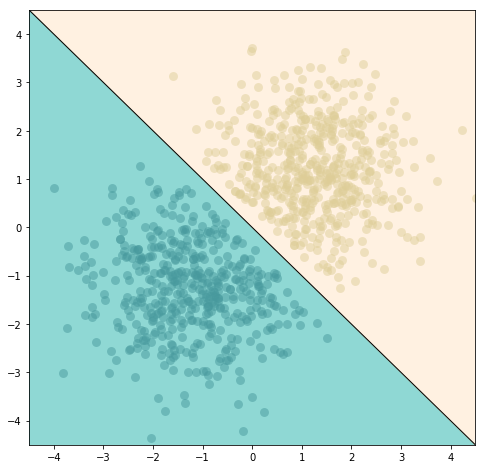

In [3]:
plot_3()

# Modern neural networks

* The main difference is that the heaviside function is replaced by a smooth "activation" function, usually the so called sigmoid
$$
    \sigma(x) = \frac{1}{1+e^{-x}}
$$
* A TLU where we replace the activation with $\sigma$ is called an artificial neuron.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

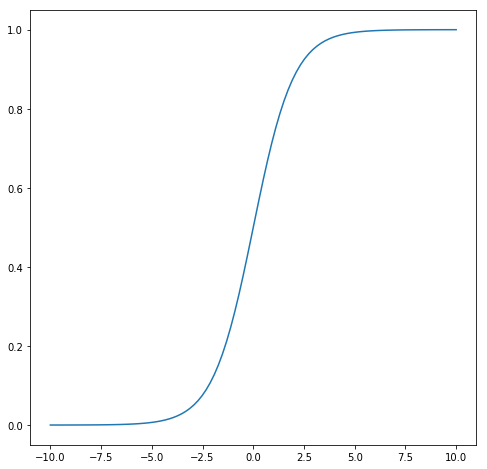

In [11]:
plt.figure(figsize=(8,8))
plt.plot(x,y)
plt.show()

# Modern neural networks
A single artificial neuron can then be represented as
$$
    h(x) = \sigma(w \cdot x + b)
$$
A simple network of these neurons are called a feed forward neural network with a single hidden layer, and it can be written as
$$
    f(x) = \sum_{j=1}^k v^j h_{w^j,b^j}(x)
$$

<center>
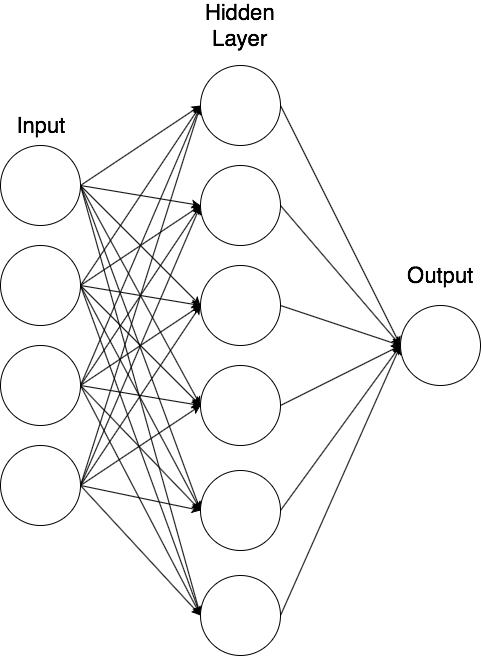
    </center>

# Modern neural networks
In the context of neural networks we let $\sigma: \mathbb{R} \to \mathbb{R}$ and with $\sigma(x)$ where $x \in \mathbb{R}^n$, we apply $\sigma$ componentwise. Denote

$$W^T = (w^1,\ldots, w^k)$$
$$B^T = (b_1,\ldots,b_k)$$
$$v^T = (v_1,\ldots,v_k)$$

then we can write $f$ as
$$
    f(x) = v^T \sigma(Wx+B)
$$

In fact if we introduce $W^{(1)},B^{(1)},W^{(2)},B^{(2)}$ we can consider

$$
\begin{align}
    f^{(1)}(x) &= \sigma(W^{(1)} x + B^{(1)})\\
    f^{(2)}(x) &= \sigma(W^{(2)} f^{(1)}(x) + B^{(2)}) \\
    f(x) &= v^T f^{(2)}(x)
\end{align}
$$

<center>
<img src="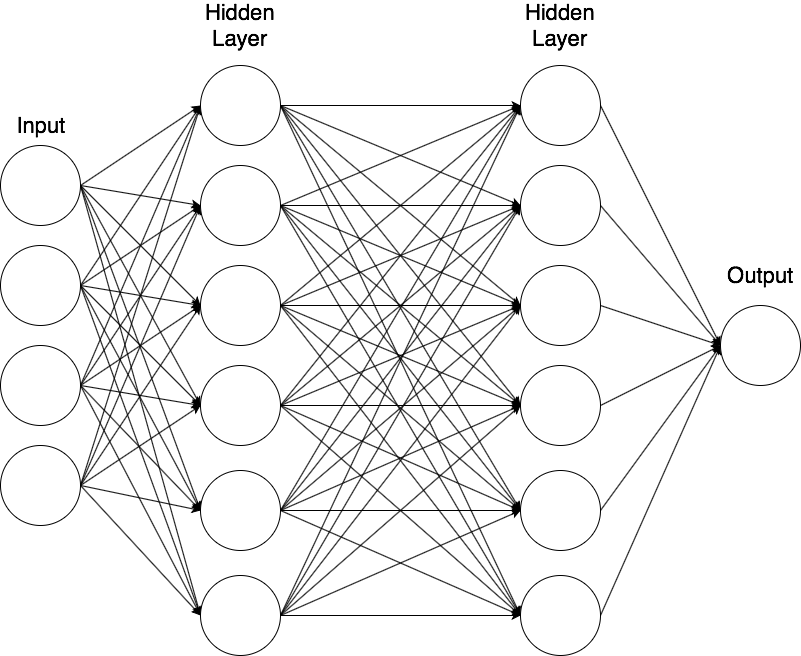
">
</center>

# Modern neural networks
* Looping back to our previous excursion in hypothesis and risk minimization, we see that $f$ is now an **Hypothesis** and the set of all $f$ when $v,W^{(j)},B^{(j)}$ takes values in the canonical $\mathbb{R}^l$ space gives $\mathcal{H}$.

# Recall
* Given a data-set $D = \{(x_1,y_1), \ldots (x_N,y_N)\}$ which are sampled i.i.d. from $\mu$. We want to minimize
$$\min_{h \in \mathcal{H}} R_{emp,D} (h) = \min_{h \in \mathcal{H}}\frac{1}{N}\sum_{i=1}^N \left[L(h(x_i),y_i)\right].$$

* But we have parametrized $\mathcal{H}$ with our choice of hypothesis.

* $R_{emp,D}$ is now a function from $\mathbb{R}^l$ to $\mathbb{R}_+$.

* We minimize using **gradient descent**.

# Gradient Descent
* The gradient of $R_{emp,D}$ is the mean of $N$ gradients. The gradient w.r.t. the parameters for each datapoint $(x_i,y_i)$ is fairly easy but $l$ can be very large!
* To do a single gradient step we have to compute $N$ very large gradients, this can be ineffective + memory intense.
* Modern networks can have up to $10^8$ parameters which is $800 \text{Mb}$ for a single gradient.
## Solution
* Compute the gradient on a randomly sampled set of the data, called a mini-batch and take a step.
* This is called (mini-batch) Stochastic Gradient Descent.

## Li, Xu, Taylor, Studer, Goldstein, 2017
<center>
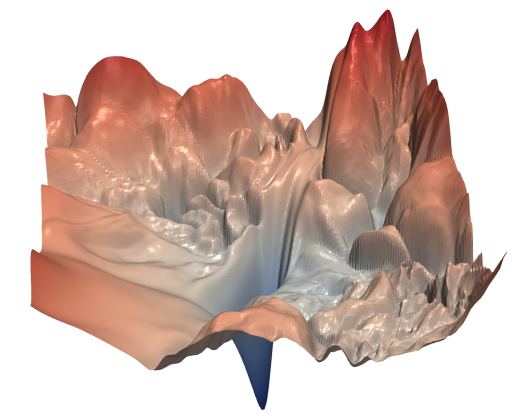
    </center>

# SGD Continuous model (Li, Tai, Weinan, 2017,2018)

* Under some growth+regularity assumptions: $$dX_t = -\nabla f(X_t) dt + \sqrt{\alpha \Sigma(X_t)} dW_t$$ is an order $1$ weak approximation of the SGD. 

# Fokker-Planck

$$dX_t = -\nabla f(X_t) dt + \sqrt{\alpha \Sigma(X_t)} dW_t$$

has a corresponding density $\rho(x,t)$ (for $X_t$) that satisfies the Fokker-Planck equation

$$\frac{\partial \rho}{\partial t} = \nabla \cdot \left (\nabla f \rho + \frac{\alpha}{2}\nabla \cdot (\Sigma \rho) \right )$$

* If $\Sigma = \sigma I$ and $f$ is convex (at infinity) then the SDE becomes the **stochastic gradient flow** equation on the potential $f$. The corresponding Fokker planck equation.

$$
    \frac{\partial \rho}{\partial t} = \nabla \cdot \left (\nabla f \rho + \frac{\sigma \alpha}{2}\nabla \rho \right )
$$

Has the following stationary solution $$\rho = e^{-\frac{2}{\sigma \alpha} f}$$

# Gradient flow
* Consider the transformation
$$\rho_1 = e^{\frac{2}{\sigma \alpha} f } \rho,$$ 

* Multiply by a compactly supported test function $\phi \in C_0^\infty$, no time dependence, then for $d \mu = e^{-\frac{2}{\sigma \alpha} f} dx$

$$
    \int \frac{\partial \rho_1}{\partial t} \phi d \mu = \int \nabla \cdot \left ( \frac{\sigma \alpha}{2} e^{-\frac{2}{\sigma \alpha} f } \nabla \rho_1 \right ) \phi dx
$$

* We can perform the integration by parts on the right hand side and get

$$
    \int \frac{\partial \rho_1}{\partial t} \phi d \mu = - \int \frac{\sigma \alpha}{2} \nabla \rho_1 \cdot \nabla \phi d \mu
$$

* Rescaling the time variable leads to a heat equation w.r.t. the measure $d \mu$

$$
    \int \frac{\partial \rho_1}{\partial t} \phi d \mu = - \int \nabla \rho_1 \cdot \nabla \phi d \mu
$$

# Conclusion 
Our stochastic gradient flow on $f$ gives rise to a gradient flow of the Dirichlet energy

$$
    E(\rho) = \frac{1}{2} \int |\nabla \rho|^2 d\mu
$$

in $L^2_\mu$.